In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot
from functools import partial, reduce
import miceforest as mf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
politicsread14 = pd.read_stata("../Downloads/PoliticsWaves/PoliticsWave14.dta")
politicsread10 = pd.read_stata("../Downloads/PoliticsWaves/PoliticsWave10.dta")
politicsread6 = pd.read_stata("../Downloads/PoliticsWaves/PoliticsWave6.dta")
politicsread4 = pd.read_stata("../Downloads/PoliticsWaves/PoliticsWave4.dta")
politicsread1 = pd.read_stata("../Downloads/PoliticsWaves/PoliticsWave1.dta")

incomeread14 = pd.read_stata("../Downloads/IncomeWaves/IncomeWave14.dta")
incomeread12 = pd.read_stata("../Downloads/IncomeWaves/IncomeWave12.dta")
incomeread5 = pd.read_stata("../Downloads/IncomeWaves/IncomeWave5.dta")
incomeread3 = pd.read_stata("../Downloads/IncomeWaves/IncomeWave3.dta")
incomeread1 = pd.read_stata("../Downloads/IncomeWaves/IncomeWave1.dta")

genderread21 = pd.read_stata("../Downloads/demographics/avars_202107_EN_1.0p.dta")
genderread17 = pd.read_stata("../Downloads/demographics/avars_201707_EN_1.0p.dta")
genderread12 = pd.read_stata("../Downloads/demographics/avars_201207_EN_2.0p.dta")
genderread10 = pd.read_stata("../Downloads/demographics/avars_201007_EN_2.0p.dta")
genderread08 = pd.read_stata("../Downloads/demographics/avars_200809_EN_2.0p.dta")


In [3]:
incomewave14 = incomeread14[['ci21n_m', 'nomem_encr', 'ci21n002', 'ci21n006', 'ci21n007', 'ci21n008', 'ci21n372', 'ci21n373', 'ci21n037', 'ci21n038',
                             'ci21n039', 'ci21n040', 'ci21n041', 'ci21n042', 'ci21n043', 'ci21n044', 'ci21n045', 'ci21n046',
                             'ci21n049', 'ci21n059', 'ci21n061', 'ci21n062', 'ci21n065', 'ci21n100',
                             'ci21n087', 'ci21n090', 'ci21n091', 'ci21n092', 'ci21n341', 'ci21n094', 'ci21n095', 
                             'ci21n096', 'ci21n098', 'ci21n099', 'ci21n101', 'ci21n144', 'ci21n155', 
                             'ci21n146', 'ci21n159', 'ci21n147', 'ci21n161', 'ci21n148', 'ci21n163', 'ci21n149', 'ci21n165', 
                             'ci21n150', 'ci21n167', 'ci21n151', 'ci21n169', 'ci21n152', 'ci21n171', 'ci21n153', 'ci21n173', 
                             'ci21n154', 'ci21n203', 'ci21n204', 'ci21n205', 'ci21n206', 'ci21n207', 
                             'ci21n208', 'ci21n209', 'ci21n210', 'ci21n211', 'ci21n212', 'ci21n213', 'ci21n214', 'ci21n337', 
                             'ci21n226', 'ci21n338', 'ci21n339', 'ci21n229', 'ci21n377', 'ci21n378', 'ci21n252', 
                             'ci21n253', 'ci21n254', 'ci21n255', 'ci21n261', 'ci21n292', 'ci21n293', 'ci21n381', 'ci21n294', 'ci21n299', 
                             'ci21n295', 'ci21n300', 'ci21n301', 'ci21n302', 'ci21n303', 'ci21n304']]

incomewave12 = incomeread12[['ci19l_m', 'nomem_encr', 'ci19l002', 'ci19l006', 'ci19l007', 'ci19l008', 'ci19l372', 'ci19l373', 'ci19l037', 'ci19l038',
                             'ci19l039', 'ci19l040', 'ci19l041', 'ci19l042', 'ci19l043', 'ci19l044', 'ci19l045', 'ci19l046',
                             'ci19l049', 'ci19l059', 'ci19l061', 'ci19l062', 'ci19l065', 'ci19l100',
                             'ci19l087', 'ci19l090', 'ci19l091', 'ci19l092', 'ci19l341', 'ci19l094', 'ci19l095', 
                             'ci19l096', 'ci19l098', 'ci19l099', 'ci19l101', 'ci19l144', 'ci19l155', 
                             'ci19l146', 'ci19l159', 'ci19l147', 'ci19l161', 'ci19l148', 'ci19l163', 'ci19l149', 'ci19l165', 
                             'ci19l150', 'ci19l167', 'ci19l151', 'ci19l169', 'ci19l152', 'ci19l171', 'ci19l153', 'ci19l173', 
                             'ci19l154', 'ci19l203', 'ci19l204', 'ci19l205', 'ci19l206', 'ci19l207', 
                             'ci19l208', 'ci19l209', 'ci19l210', 'ci19l211', 'ci19l212', 'ci19l213', 'ci19l214', 'ci19l337', 
                             'ci19l226', 'ci19l338', 'ci19l339', 'ci19l229', 'ci19l377', 'ci19l378', 'ci19l252', 
                             'ci19l253', 'ci19l254', 'ci19l255', 'ci19l261', 'ci19l292', 'ci19l293', 'ci19l381', 'ci19l294', 'ci19l299', 
                             'ci19l295', 'ci19l300', 'ci19l301', 'ci19l302', 'ci19l303', 'ci19l304']]

incomewave5 = incomeread5[['ci12e_m', 'nomem_encr', 'ci12e002', 'ci12e006', 'ci12e007', 'ci12e008','ci12e010', 'ci12e011', 'ci12e037', 'ci12e038',
                             'ci12e039', 'ci12e040', 'ci12e041', 'ci12e042', 'ci12e043', 'ci12e044', 'ci12e045', 'ci12e046',
                             'ci12e049', 'ci12e059', 'ci12e061', 'ci12e062', 'ci12e065', 'ci12e100',
                             'ci12e087','ci12e090', 'ci12e091', 'ci12e092', 'ci12e341', 'ci12e094', 'ci12e095', 
                             'ci12e097', 'ci12e098', 'ci12e099', 'ci12e101', 'ci12e144', 'ci12e155', 
                             'ci12e146', 'ci12e159', 'ci12e147', 'ci12e161', 'ci12e148', 'ci12e163', 'ci12e149', 'ci12e165', 
                             'ci12e150', 'ci12e167', 'ci12e151', 'ci12e169', 'ci12e152', 'ci12e171', 'ci12e153', 'ci12e173', 
                             'ci12e154', 'ci12e203', 'ci12e204', 'ci12e205', 'ci12e206', 'ci12e207', 
                             'ci12e208', 'ci12e209', 'ci12e210', 'ci12e211', 'ci12e212', 'ci12e213', 'ci12e214', 'ci12e337', 
                             'ci12e226', 'ci12e338', 'ci12e339', 'ci12e229', 'ci12e243', 'ci12e244', 'ci12e252', 
                             'ci12e253', 'ci12e254', 'ci12e255', 'ci12e261', 'ci12e292', 'ci12e293', 'ci12e298', 'ci12e294', 'ci12e299', 
                             'ci12e295', 'ci12e300', 'ci12e301', 'ci12e302', 'ci12e303', 'ci12e304']]

incomewave3 = incomeread3[['ci10c_m', 'nomem_encr', 'ci10c002', 'ci10c006', 'ci10c007', 'ci10c008','ci10c010', 'ci10c011', 'ci10c037', 'ci10c038',
                             'ci10c039', 'ci10c040', 'ci10c041', 'ci10c042', 'ci10c043', 'ci10c044', 'ci10c045', 'ci10c046',
                             'ci10c049', 'ci10c059', 'ci10c061', 'ci10c062', 'ci10c065', 'ci10c100',
                             'ci10c087', 'ci10c090', 'ci10c091', 'ci10c092', 'ci10c093', 'ci10c094', 'ci10c095', 
                             'ci10c097', 'ci10c098', 'ci10c099', 'ci10c101', 'ci10c144', 'ci10c155', 
                             'ci10c146', 'ci10c159', 'ci10c147', 'ci10c161', 'ci10c148', 'ci10c163', 'ci10c149', 'ci10c165', 
                             'ci10c150', 'ci10c167', 'ci10c151', 'ci10c169', 'ci10c152', 'ci10c171', 'ci10c153', 'ci10c173', 
                             'ci10c154', 'ci10c203', 'ci10c204', 'ci10c205', 'ci10c206', 'ci10c207', 
                             'ci10c208', 'ci10c209', 'ci10c210', 'ci10c211', 'ci10c212', 'ci10c213', 'ci10c214', 'ci10c337', 
                             'ci10c226', 'ci10c338', 'ci10c339', 'ci10c229', 'ci10c243', 'ci10c244', 'ci10c252', 
                             'ci10c253', 'ci10c254', 'ci10c255', 'ci10c261', 'ci10c292', 'ci10c293', 'ci10c298', 'ci10c294', 'ci10c299', 
                             'ci10c295', 'ci10c300', 'ci10c301', 'ci10c302', 'ci10c303', 'ci10c304']]

incomewave1 = incomeread1[['ci08a_m', 'nomem_encr', 'ci08a002', 'ci08a006', 'ci08a007', 'ci08a008', 'ci08a010', 'ci08a011', 'ci08a037', 'ci08a038',
                             'ci08a039', 'ci08a040', 'ci08a041', 'ci08a042', 'ci08a043', 'ci08a044', 'ci08a045', 'ci08a046',
                             'ci08a049', 'ci08a059', 'ci08a061', 'ci08a062', 'ci08a065', 'ci08a100',
                             'ci08a087', 'ci08a090', 'ci08a091', 'ci08a092', 'ci08a093', 'ci08a094', 'ci08a095', 
                             'ci08a097', 'ci08a098', 'ci08a099', 'ci08a101', 'ci08a144', 'ci08a155', 
                             'ci08a146', 'ci08a159', 'ci08a147', 'ci08a161', 'ci08a148', 'ci08a163', 'ci08a149', 'ci08a165', 
                             'ci08a150', 'ci08a167', 'ci08a151', 'ci08a169', 'ci08a152', 'ci08a171', 'ci08a153', 'ci08a173', 
                             'ci08a154', 'ci08a203', 'ci08a204', 'ci08a205', 'ci08a206', 'ci08a207', 
                             'ci08a208', 'ci08a209', 'ci08a210', 'ci08a211', 'ci08a212', 'ci08a213', 'ci08a214', 'ci08a225', 
                             'ci08a226', 'ci08a227', 'ci08a228', 'ci08a229', 'ci08a243', 'ci08a244', 'ci08a252', 
                             'ci08a253', 'ci08a254', 'ci08a255', 'ci08a261', 'ci08a292', 'ci08a293', 'ci08a298', 'ci08a294', 'ci08a299', 
                             'ci08a295', 'ci08a300', 'ci08a301', 'ci08a302', 'ci08a303', 'ci08a304']]

In [4]:
politics14 = politicsread14[['nomem_encr','cv22n307']]
politics10 = politicsread10[['nomem_encr','cv18j307']]
politics6 = politicsread6[['nomem_encr','cv13f207']]
politics4 = politicsread4[['nomem_encr','cv11d169']]
politics1 = politicsread1[['nomem_encr','cv08a054']]

In [5]:
gender21 = genderread21[['nomem_encr', 'geslacht']]
gender17 = genderread17[['nomem_encr', 'geslacht']]
gender12 = genderread12[['nomem_encr', 'geslacht']]
gender10 = genderread10[['nomem_encr', 'geslacht']]
gender08 = genderread08[['nomem_encr', 'geslacht']]

# Renaming economic features

In [6]:
income14 = incomewave14.rename(columns = {'ci21n_m': 'date','nomem_encr': 'respondent_ID', 'ci21n002': 'age', 
                                          'ci21n006': 'satisfaction_individual', 'ci21n007': 'satisfaction_national',
                                          'ci21n008': 'income', 'ci21n372': 'gross_wages_amount', 'ci21n373': 'gross_wages_category',
                                          'ci21n037': 'entrepreneur_freelancer', 'ci21n038': 'entrepreneur_freelancer_alongside',
                                          'ci21n039': 'one_person_business', 'ci21n040': 'company_owner', 'ci21n041': 'partnership',
                                          'ci21n042': 'partner_partnership', 'ci21n043': 'private_limited_liability_company',
                                          'ci21n044': 'other', 'ci21n045': 'none_work_situation', 'ci21n046': 'know_fiscalprofit',
                                          'ci21n049': 'fiscalprofit_amount', 'ci21n059': 'self_employment', 'ci21n061': 'fiscal_profit_self_amount',
                                          'ci21n062': 'fiscal_profit_self_amount_category', 'ci21n065': 'early_retirement', 'ci21n100': 'zorgtoeslag',
                                          'ci21n087': 'Ziektewetuitkering',
                                          'ci21n090': 'ANW', 'ci21n091': 'nabestaandenpensioen', 'ci21n092': 'orphan_pension',
                                          'ci21n341': 'bijstand', 'ci21n094': 'bijstand_zelfstandigen', 'ci21n095': 'IOAWIOAZ', 
                                          'ci21n096': 'WGA', 'ci21n098': 'invadility_pension', 'ci21n099': 'kinderbijslag',
                                          'ci21n101': 'none_benefit', 'ci21n144': 'income_realestate',
                                          'ci21n155': 'realestate_amount', 
                                          'ci21n146': 'student_grant', 'ci21n159': 'amount_student_grant', 'ci21n147': 'student_loan', 
                                          'ci21n161': 'amount_student_loan', 'ci21n148': 'alimony_ex',
                                          'ci21n163': 'amount_alimony_ex', 'ci21n149': 'alimony_children', 'ci21n165': 'amount_alimony_children',
                                          'ci21n150': 'study_allowance_parents', 'ci21n167': 'amount_study_allowance_parents',
                                          'ci21n151': 'allowence_family',
                                          'ci21n169': 'amount_allowance_family', 'ci21n152': 'dividend_stock_investment', 
                                          'ci21n171': 'amount_dividend_stock_investment', 'ci21n153': 'interests',
                                          'ci21n173': 'amount_interests', 'ci21n154': 'none_sources', 'ci21n203': 'interest_loans', 
                                          'ci21n204': 'amount_interest_loans', 'ci21n205': 'alimony_ex_paid', 'ci21n206': 'amount_alimony_ex_paid', 
                                          'ci21n207': 'alimony_children_paid', 'ci21n208': 'amount_alimony_children_paid', 
                                          'ci21n209': 'parental_support_paid', 'ci21n210': 'amount_parental_support_paid', 
                                          'ci21n211': 'parental_support_paid_other', 'ci21n212': 'amount_parental_support_paid_other', 
                                          'ci21n213': 'support_gift_paid', 'ci21n214': 'amount_support_gift_paid', 'ci21n337': 'taxable_income', 
                                          'ci21n226': 'taxable_income_category', 'ci21n338': 'taxable_income_estimate', 'ci21n339': 'net_income_household',
                                          'ci21n229': 'net_income_household_category', 'ci21n377': 'financial_situation_grade', 'ci21n378': 'difficulty_life_grade',
                                          'ci21n252': 'financial_situation_category', 'ci21n253': 'household_expenditure', 'ci21n254': 'big_purchase',
                                          'ci21n255': 'expenditure_without_purchase', 'ci21n261': 'financial_situation_future', 
                                          'ci21n292': 'no_arrears', 'ci21n293': 'rent_mortgage_arrears', 'ci21n381': 'amount_rent_mortgage_arrears', 
                                          'ci21n294': 'general_utilities_arrear', 'ci21n299': 'amount_general_utilities_arrear', 
                                          'ci21n295': 'other_arrears', 'ci21n300': 'amount_other_arrears', 'ci21n301': 'months_arrears_rent',
                                          'ci21n302': 'largest_arrear_rent', 'ci21n303': 'months_arrears_general_utilities', 
                                          'ci21n304': 'largest_arrears_general_utilities'})

In [7]:
income12 = incomewave12.rename(columns = {'ci19l_m': 'date', 'nomem_encr': 'respondent_ID', 'ci19l002': 'age',
                                          'ci19l006': 'satisfaction_individual', 'ci19l007': 'satisfaction_national',
                                          'ci19l008': 'income', 'ci19l372': 'gross_wages_amount', 'ci19l373': 'gross_wages_category',
                                          'ci19l037': 'entrepreneur_freelancer', 'ci19l038': 'entrepreneur_freelancer_alongside',
                                          'ci19l039': 'one_person_business', 'ci19l040': 'company_owner', 'ci19l041': 'partnership',
                                          'ci19l042': 'partner_partnership', 'ci19l043': 'private_limited_liability_company',
                                          'ci19l044': 'other', 'ci19l045': 'none_work_situation', 'ci19l046': 'know_fiscalprofit',
                                          'ci19l049': 'fiscalprofit_amount', 'ci19l059': 'self_employment', 'ci19l061': 'fiscal_profit_self_amount',
                                          'ci19l062': 'fiscal_profit_self_amount_category', 'ci19l065': 'early_retirement', 'ci19l100': 'zorgtoeslag',
                                          'ci19l087': 'Ziektewetuitkering',
                                          'ci19l090': 'ANW', 'ci19l091': 'nabestaandenpensioen', 'ci19l092': 'orphan_pension',
                                          'ci19l341': 'bijstand', 'ci19l094': 'bijstand_zelfstandigen', 'ci19l095': 'IOAWIOAZ', 
                                          'ci19l096': 'WGA', 'ci19l098': 'invadility_pension', 'ci19l099': 'kinderbijslag',
                                          'ci19l101': 'none_benefit', 'ci19l144': 'income_realestate',
                                          'ci19l155': 'realestate_amount', 
                                          'ci19l146': 'student_grant', 'ci19l159': 'amount_student_grant', 'ci19l147': 'student_loan', 
                                          'ci19l161': 'amount_student_loan', 'ci19l148': 'alimony_ex',
                                          'ci19l163': 'amount_alimony_ex', 'ci19l149': 'alimony_children', 'ci19l165': 'amount_alimony_children',
                                          'ci19l150': 'study_allowance_parents', 'ci19l167': 'amount_study_allowance_parents',
                                          'ci19l151': 'allowence_family',
                                          'ci19l169': 'amount_allowance_family', 'ci19l152': 'dividend_stock_investment', 
                                          'ci19l171': 'amount_dividend_stock_investment', 'ci19l153': 'interests',
                                          'ci19l173': 'amount_interests', 'ci19l154': 'none_sources', 'ci19l203': 'interest_loans', 
                                          'ci19l204': 'amount_interest_loans', 'ci19l205': 'alimony_ex_paid', 'ci19l206': 'amount_alimony_ex_paid', 
                                          'ci19l207': 'alimony_children_paid', 'ci19l208': 'amount_alimony_children_paid', 
                                          'ci19l209': 'parental_support_paid', 'ci19l210': 'amount_parental_support_paid', 
                                          'ci19l211': 'parental_support_paid_other', 'ci19l212': 'amount_parental_support_paid_other', 
                                          'ci19l213': 'support_gift_paid', 'ci19l214': 'amount_support_gift_paid', 'ci19l337': 'taxable_income', 
                                          'ci19l226': 'taxable_income_category', 'ci19l338': 'taxable_income_estimate', 'ci19l339': 'net_income_household',
                                          'ci19l229': 'net_income_household_category', 'ci19l377': 'financial_situation_grade', 'ci19l378': 'difficulty_life_grade',
                                          'ci19l252': 'financial_situation_category', 'ci19l253': 'household_expenditure', 'ci19l254': 'big_purchase',
                                          'ci19l255': 'expenditure_without_purchase', 'ci19l261': 'financial_situation_future', 
                                          'ci19l292': 'no_arrears', 'ci19l293': 'rent_mortgage_arrears', 'ci19l381': 'amount_rent_mortgage_arrears', 
                                          'ci19l294': 'general_utilities_arrear', 'ci19l299': 'amount_general_utilities_arrear', 
                                          'ci19l295': 'other_arrears', 'ci19l300': 'amount_other_arrears', 'ci19l301': 'months_arrears_rent',
                                          'ci19l302': 'largest_arrear_rent', 'ci19l303': 'months_arrears_general_utilities', 
                                          'ci19l304': 'largest_arrears_general_utilities'})

In [8]:
income5 = incomewave5.rename(columns = {'ci12e_m': 'date', 'nomem_encr': 'respondent_ID', 'ci12e002': 'age',
                                          'ci12e006': 'satisfaction_individual', 'ci12e007': 'satisfaction_national',
                                          'ci12e008': 'income', 'ci12e010': 'gross_wages_amount', 'ci12e011': 'gross_wages_category',
                                          'ci12e037': 'entrepreneur_freelancer', 'ci12e038': 'entrepreneur_freelancer_alongside',
                                          'ci12e039': 'one_person_business', 'ci12e040': 'company_owner', 'ci12e041': 'partnership',
                                          'ci12e042': 'partner_partnership', 'ci12e043': 'private_limited_liability_company',
                                          'ci12e044': 'other', 'ci12e045': 'none_work_situation', 'ci12e046': 'know_fiscalprofit',
                                          'ci12e049': 'fiscalprofit_amount', 'ci12e059': 'self_employment', 'ci12e061': 'fiscal_profit_self_amount',
                                          'ci12e062': 'fiscal_profit_self_amount_category', 'ci12e065': 'early_retirement', 'ci12e100': 'zorgtoeslag',
                                          'ci12e087': 'Ziektewetuitkering',
                                          'ci12e090': 'ANW', 'ci12e091': 'nabestaandenpensioen', 'ci12e092': 'orphan_pension',
                                          'ci12e341': 'bijstand', 'ci12e094': 'bijstand_zelfstandigen', 'ci12e095': 'IOAWIOAZ',
                                          'ci12e097': 'WGA', 'ci12e098': 'invadility_pension', 'ci12e099': 'kinderbijslag',
                                          'ci12e101': 'none_benefit', 'ci12e144': 'income_realestate',
                                          'ci12e155': 'realestate_amount', 
                                          'ci12e146': 'student_grant', 'ci12e159': 'amount_student_grant', 'ci12e147': 'student_loan', 
                                          'ci12e161': 'amount_student_loan', 'ci12e148': 'alimony_ex',
                                          'ci12e163': 'amount_alimony_ex', 'ci12e149': 'alimony_children', 'ci12e165': 'amount_alimony_children',
                                          'ci12e150': 'study_allowance_parents', 'ci12e167': 'amount_study_allowance_parents',
                                          'ci12e151': 'allowence_family',
                                          'ci12e169': 'amount_allowance_family', 'ci12e152': 'dividend_stock_investment', 
                                          'ci12e171': 'amount_dividend_stock_investment', 'ci12e153': 'interests',
                                          'ci12e173': 'amount_interests', 'ci12e154': 'none_sources', 'ci12e203': 'interest_loans', 
                                          'ci12e204': 'amount_interest_loans', 'ci12e205': 'alimony_ex_paid', 'ci12e206': 'amount_alimony_ex_paid', 
                                          'ci12e207': 'alimony_children_paid', 'ci12e208': 'amount_alimony_children_paid', 
                                          'ci12e209': 'parental_support_paid', 'ci12e210': 'amount_parental_support_paid', 
                                          'ci12e211': 'parental_support_paid_other', 'ci12e212': 'amount_parental_support_paid_other', 
                                          'ci12e213': 'support_gift_paid', 'ci12e214': 'amount_support_gift_paid', 'ci12e337': 'taxable_income', 
                                          'ci12e226': 'taxable_income_category', 'ci12e338': 'taxable_income_estimate', 'ci12e339': 'net_income_household',
                                          'ci12e229': 'net_income_household_category', 'ci12e243': 'financial_situation_grade', 'ci12e244': 'difficulty_life_grade',
                                          'ci12e252': 'financial_situation_category', 'ci12e253': 'household_expenditure', 'ci12e254': 'big_purchase',
                                          'ci12e255': 'expenditure_without_purchase', 'ci12e261': 'financial_situation_future', 
                                          'ci12e292': 'no_arrears', 'ci12e293': 'rent_mortgage_arrears', 'ci12e298': 'amount_rent_mortgage_arrears', 
                                          'ci12e294': 'general_utilities_arrear', 'ci12e299': 'amount_general_utilities_arrear', 
                                          'ci12e295': 'other_arrears', 'ci12e300': 'amount_other_arrears', 'ci12e301': 'months_arrears_rent',
                                          'ci12e302': 'largest_arrear_rent', 'ci12e303': 'months_arrears_general_utilities', 
                                          'ci12e304': 'largest_arrears_general_utilities'})

In [9]:
income3 = incomewave3.rename(columns = {'ci10c_m': 'date', 'nomem_encr': 'respondent_ID', 'ci10c002': 'age',
                                          'ci10c006': 'satisfaction_individual', 'ci10c007': 'satisfaction_national',
                                          'ci10c008': 'income', 'ci10c010': 'gross_wages_amount', 'ci10c011': 'gross_wages_category',
                                          'ci10c037': 'entrepreneur_freelancer', 'ci10c038': 'entrepreneur_freelancer_alongside',
                                          'ci10c039': 'one_person_business', 'ci10c040': 'company_owner', 'ci10c041': 'partnership',
                                          'ci10c042': 'partner_partnership', 'ci10c043': 'private_limited_liability_company',
                                          'ci10c044': 'other', 'ci10c045': 'none_work_situation', 'ci10c046': 'know_fiscalprofit',
                                          'ci10c049': 'fiscalprofit_amount', 'ci10c059': 'self_employment', 'ci10c061': 'fiscal_profit_self_amount',
                                          'ci10c062': 'fiscal_profit_self_amount_category', 'ci10c065': 'early_retirement', 'ci10c100': 'zorgtoeslag',
                                          'ci10c087': 'Ziektewetuitkering',
                                          'ci10c090': 'ANW', 'ci10c091': 'nabestaandenpensioen', 'ci10c092': 'orphan_pension',
                                          'ci10c093': 'bijstand', 'ci10c094': 'bijstand_zelfstandigen', 'ci10c095': 'IOAWIOAZ', 
                                          'ci10c097': 'WGA', 'ci10c098': 'invadility_pension', 'ci10c099': 'kinderbijslag',
                                          'ci10c101': 'none_benefit', 'ci10c144': 'income_realestate',
                                          'ci10c155': 'realestate_amount', 
                                          'ci10c146': 'student_grant', 'ci10c159': 'amount_student_grant', 'ci10c147': 'student_loan', 
                                          'ci10c161': 'amount_student_loan', 'ci10c148': 'alimony_ex',
                                          'ci10c163': 'amount_alimony_ex', 'ci10c149': 'alimony_children', 'ci10c165': 'amount_alimony_children',
                                          'ci10c150': 'study_allowance_parents', 'ci10c167': 'amount_study_allowance_parents',
                                          'ci10c151': 'allowence_family',
                                          'ci10c169': 'amount_allowance_family', 'ci10c152': 'dividend_stock_investment', 
                                          'ci10c171': 'amount_dividend_stock_investment', 'ci10c153': 'interests',
                                          'ci10c173': 'amount_interests', 'ci10c154': 'none_sources', 'ci10c203': 'interest_loans', 
                                          'ci10c204': 'amount_interest_loans', 'ci10c205': 'alimony_ex_paid', 'ci10c206': 'amount_alimony_ex_paid', 
                                          'ci10c207': 'alimony_children_paid', 'ci10c208': 'amount_alimony_children_paid', 
                                          'ci10c209': 'parental_support_paid', 'ci10c210': 'amount_parental_support_paid', 
                                          'ci10c211': 'parental_support_paid_other', 'ci10c212': 'amount_parental_support_paid_other', 
                                          'ci10c213': 'support_gift_paid', 'ci10c214': 'amount_support_gift_paid', 'ci10c337': 'taxable_income', 
                                          'ci10c226': 'taxable_income_category', 'ci10c338': 'taxable_income_estimate', 'ci10c339': 'net_income_household',
                                          'ci10c229': 'net_income_household_category', 'ci10c243': 'financial_situation_grade', 'ci10c244': 'difficulty_life_grade',
                                          'ci10c252': 'financial_situation_category', 'ci10c253': 'household_expenditure', 'ci10c254': 'big_purchase',
                                          'ci10c255': 'expenditure_without_purchase', 'ci10c261': 'financial_situation_future', 
                                          'ci10c292': 'no_arrears', 'ci10c293': 'rent_mortgage_arrears', 'ci10c298': 'amount_rent_mortgage_arrears', 
                                          'ci10c294': 'general_utilities_arrear', 'ci10c299': 'amount_general_utilities_arrear', 
                                          'ci10c295': 'other_arrears', 'ci10c300': 'amount_other_arrears', 'ci10c301': 'months_arrears_rent',
                                          'ci10c302': 'largest_arrear_rent', 'ci10c303': 'months_arrears_general_utilities', 
                                          'ci10c304': 'largest_arrears_general_utilities'})

In [10]:
income1 = incomewave1.rename(columns = {'ci08a_m': 'date', 'nomem_encr': 'respondent_ID', 'ci08a002': 'age',
                                          'ci08a006': 'satisfaction_individual', 'ci08a007': 'satisfaction_national',
                                          'ci08a008': 'income', 'ci08a010': 'gross_wages_amount', 'ci08a011': 'gross_wages_category',
                                          'ci08a037': 'entrepreneur_freelancer', 'ci08a038': 'entrepreneur_freelancer_alongside',
                                          'ci08a039': 'one_person_business', 'ci08a040': 'company_owner', 'ci08a041': 'partnership',
                                          'ci08a042': 'partner_partnership', 'ci08a043': 'private_limited_liability_company',
                                          'ci08a044': 'other', 'ci08a045': 'none_work_situation', 'ci08a046': 'know_fiscalprofit',
                                          'ci08a049': 'fiscalprofit_amount', 'ci08a059': 'self_employment', 'ci08a061': 'fiscal_profit_self_amount',
                                          'ci08a062': 'fiscal_profit_self_amount_category', 'ci08a065': 'early_retirement', 'ci08a100': 'zorgtoeslag',
                                          'ci08a327': 'kindgebondenbudget', 'ci08a087': 'Ziektewetuitkering',
                                          'ci08a090': 'ANW', 'ci08a091': 'nabestaandenpensioen', 'ci08a092': 'orphan_pension',
                                          'ci08a093': 'bijstand', 'ci08a094': 'bijstand_zelfstandigen', 'ci08a095': 'IOAWIOAZ', 
                                          'ci08a097': 'WGA', 'ci08a098': 'invadility_pension', 'ci08a099': 'kinderbijslag',
                                          'ci08a101': 'none_benefit', 'ci08a144': 'income_realestate', 'ci08a155': 'realestate_amount', 
                                          'ci08a146': 'student_grant', 'ci08a159': 'amount_student_grant', 'ci08a147': 'student_loan', 
                                          'ci08a161': 'amount_student_loan', 'ci08a148': 'alimony_ex',
                                          'ci08a163': 'amount_alimony_ex', 'ci08a149': 'alimony_children', 'ci08a165': 'amount_alimony_children',
                                          'ci08a150': 'study_allowance_parents', 'ci08a167': 'amount_study_allowance_parents',
                                          'ci08a151': 'allowence_family',
                                          'ci08a169': 'amount_allowance_family', 'ci08a152': 'dividend_stock_investment', 
                                          'ci08a171': 'amount_dividend_stock_investment', 'ci08a153': 'interests',
                                          'ci08a173': 'amount_interests', 'ci08a154': 'none_sources', 'ci08a203': 'interest_loans', 
                                          'ci08a204': 'amount_interest_loans', 'ci08a205': 'alimony_ex_paid', 'ci08a206': 'amount_alimony_ex_paid', 
                                          'ci08a207': 'alimony_children_paid', 'ci08a208': 'amount_alimony_children_paid', 
                                          'ci08a209': 'parental_support_paid', 'ci08a210': 'amount_parental_support_paid', 
                                          'ci08a211': 'parental_support_paid_other', 'ci08a212': 'amount_parental_support_paid_other', 
                                          'ci08a213': 'support_gift_paid', 'ci08a214': 'amount_support_gift_paid', 'ci08a225': 'taxable_income', 
                                          'ci08a226': 'taxable_income_category', 'ci08a227': 'taxable_income_estimate', 'ci08a228': 'net_income_household',
                                          'ci08a229': 'net_income_household_category', 'ci08a243': 'financial_situation_grade', 'ci08a244': 'difficulty_life_grade',
                                          'ci08a252': 'financial_situation_category', 'ci08a253': 'household_expenditure', 'ci08a254': 'big_purchase',
                                          'ci08a255': 'expenditure_without_purchase', 'ci08a261': 'financial_situation_future', 
                                          'ci08a292': 'no_arrears', 'ci08a293': 'rent_mortgage_arrears', 'ci08a298': 'amount_rent_mortgage_arrears', 
                                          'ci08a294': 'general_utilities_arrear', 'ci08a299': 'amount_general_utilities_arrear', 
                                          'ci08a295': 'other_arrears', 'ci08a300': 'amount_other_arrears', 'ci08a301': 'months_arrears_rent',
                                          'ci08a302': 'largest_arrear_rent', 'ci08a303': 'months_arrears_general_utilities', 
                                          'ci08a304': 'largest_arrears_general_utilities'})

# Renaming party vote feature

In [11]:
politics14 = politics14.rename(columns={"nomem_encr": "respondent_ID", "cv22n307": "partyvote"})
politics10 = politics10.rename(columns={"nomem_encr": "respondent_ID", "cv18j307": "partyvote"})
politics6 = politics6.rename(columns={"nomem_encr": "respondent_ID", "cv13f207": "partyvote"})
politics4 = politics4.rename(columns={"nomem_encr": "respondent_ID", "cv11d169": "partyvote"})
politics1 = politics1.rename(columns={"nomem_encr": "respondent_ID", "cv08a054": "partyvote"})

# Renaming demographic feature

In [12]:
gender21 = gender21.rename(columns={"nomem_encr": "respondent_ID", "geslacht": "sex"})
gender17 = gender17.rename(columns={"nomem_encr": "respondent_ID", "geslacht": "sex"})
gender12 = gender12.rename(columns={"nomem_encr": "respondent_ID", "geslacht": "sex"})
gender10 = gender10.rename(columns={"nomem_encr": "respondent_ID", "geslacht": "sex"})
gender08 = gender08.rename(columns={"nomem_encr": "respondent_ID", "geslacht": "sex"})

__Exploratory Data Analysis for Party Vote Distribution__

<AxesSubplot:>

C:\Users\Gebruiker\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


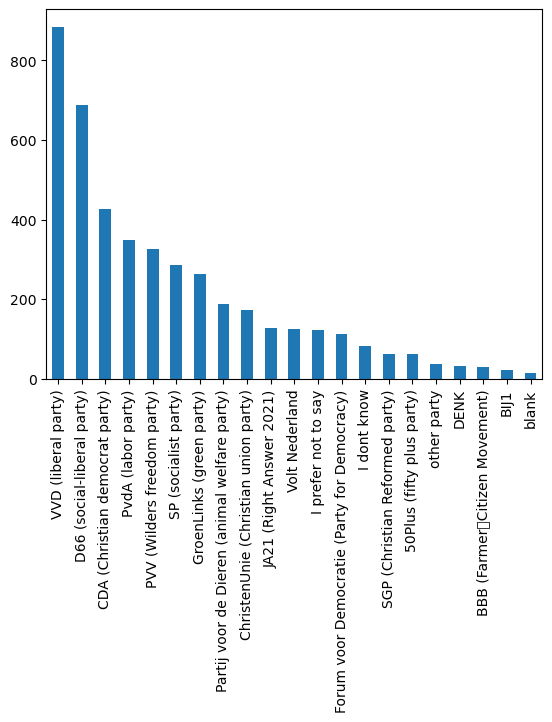

In [85]:
politics14.partyvote.value_counts().plot.bar()

In [ ]:
politics14['percent'] = (politics14['Math_score'] / 
                  politics14['Math_score'].sum()) * 100

<AxesSubplot:>

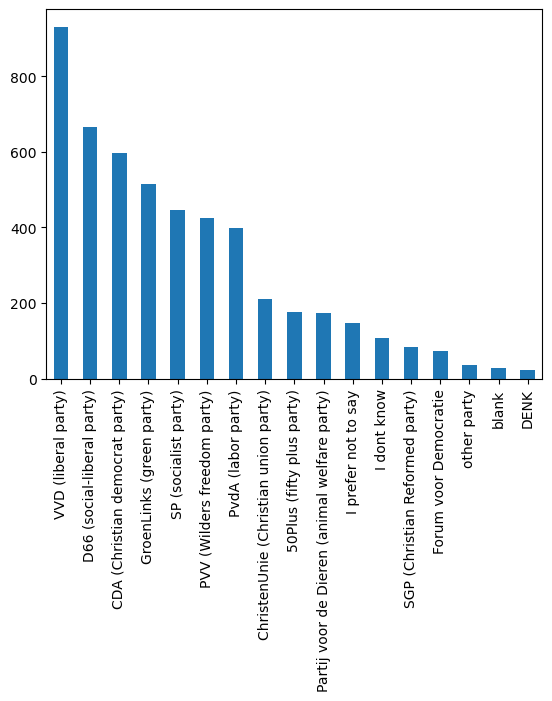

In [86]:
politics10.partyvote.value_counts().plot.bar()

<AxesSubplot:>

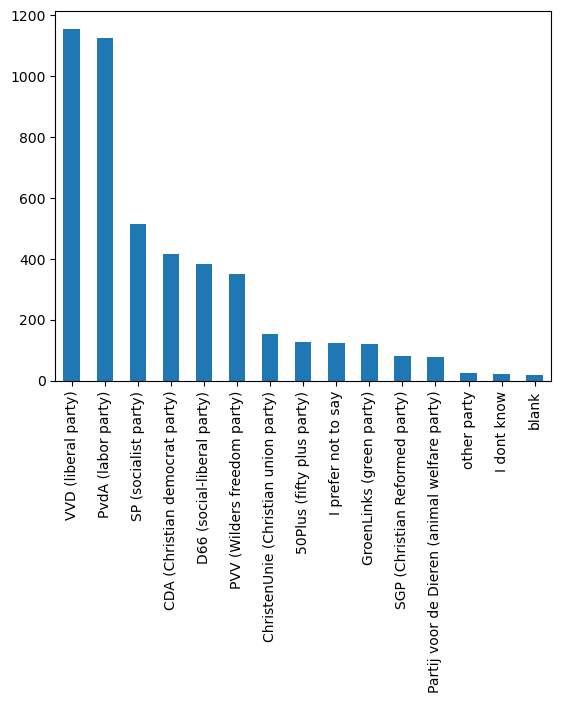

In [87]:
politics6.partyvote.value_counts().plot.bar()

<AxesSubplot:>

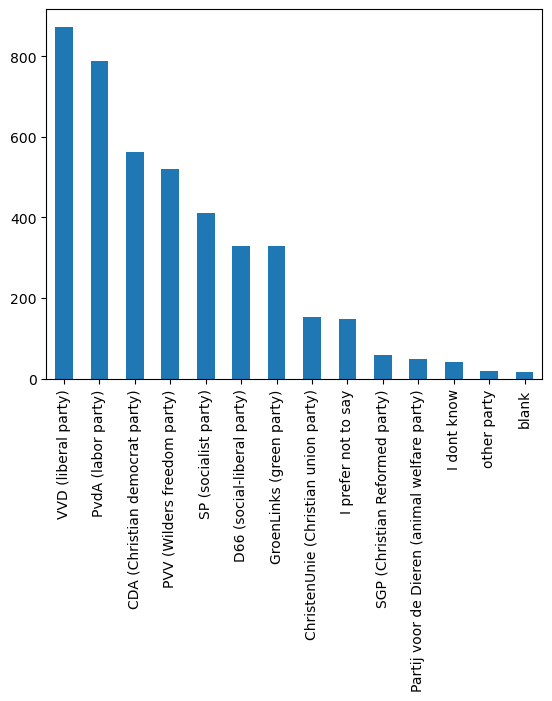

In [88]:
politics4.partyvote.value_counts().plot.bar()

<AxesSubplot:>

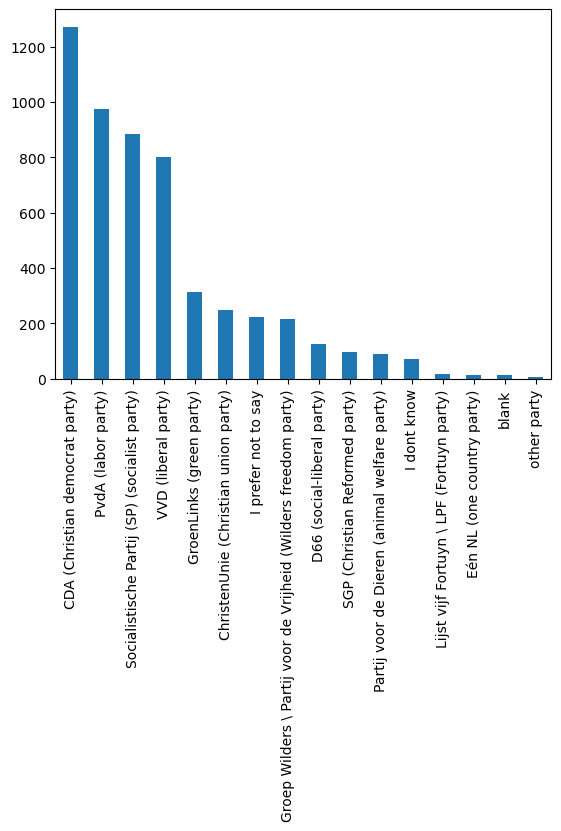

In [89]:
politics1.partyvote.value_counts().plot.bar()

# Merging datasets

In [90]:
merged2021 = pd.merge(pd.merge(income14,politics14),gender21)
merged2017 = pd.merge(pd.merge(income12,politics10),gender17)
merged2012 = pd.merge(pd.merge(income5,politics6),gender12)
merged2010 = pd.merge(pd.merge(income3,politics4),gender10)
merged2006 = pd.merge(pd.merge(income1,politics1),gender08)


In [91]:
print(gender21.shape)
print(gender17.shape)
print(gender12.shape)
print(gender10.shape)
print(gender08.shape)

(10110, 2)
(11795, 2)
(11211, 2)
(11937, 2)
(12447, 2)


In [92]:
print(politics14.shape)
print(politics10.shape)
print(politics6.shape)
print(politics4.shape)
print(politics1.shape)

(5626, 2)
(6263, 2)
(5732, 2)
(5394, 2)
(6811, 2)


In [93]:
print(income14.shape)
print(income12.shape)
print(income5.shape)
print(income3.shape)
print(income1.shape)

(5063, 89)
(4968, 89)
(5761, 89)
(5610, 89)
(6032, 89)


In [94]:
print(merged2021.shape)
print(merged2017.shape)
print(merged2012.shape)
print(merged2010.shape)
print(merged2006.shape)

(4797, 91)
(4575, 91)
(5145, 91)
(4679, 91)
(5168, 91)


# Concatenating sets (ignore_index=True)

In [95]:
finaldataset = pd.concat([merged2021, merged2017, merged2012, merged2010, merged2006], ignore_index=True)

In [96]:
finaldataset.shape

(24364, 91)

__change order for 'sex' column__ 

In [97]:
finaldataset.insert(2, 'sex', finaldataset.pop('sex'))

&nbsp;

# Removing target variable rows with invalid answers

In [98]:
finaldataset = finaldataset[finaldataset.partyvote != 'I dont know']
finaldataset = finaldataset[finaldataset.partyvote != 'I prefer not to say']

In [99]:
finaldataset.shape

(23493, 91)

In [100]:
finaldataset = finaldataset[finaldataset['partyvote'].notna()]

In [101]:
finaldataset.shape

(18917, 91)

In [102]:
len(finaldataset.index)

18917

&nbsp;

# Transforming all string values to numeric

In [103]:
## satisfaction (0-10)
finaldataset['satisfaction_individual'] = finaldataset['satisfaction_individual'].replace(['10 entirely satisfied', 'entirely satisfied'], '10')
finaldataset['satisfaction_individual'] = finaldataset['satisfaction_individual'].replace(['0 not at all satisfied', 'not at all satisfied'], '0')
finaldataset['satisfaction_national'] = finaldataset['satisfaction_national'].replace(['10 entirely satisfied', 'entirely satisfied'], '10')
finaldataset['satisfaction_national'] = finaldataset['satisfaction_national'].replace(['0 not at all satisfied', 'not at all satisfied'], '0')

In [104]:
## situation grade (0-10)
finaldataset['financial_situation_grade'] = finaldataset['financial_situation_grade'].replace(['10 much better', 'much better'], '10')
finaldataset['financial_situation_grade'] = finaldataset['financial_situation_grade'].replace(['0 much worse', 'much worse'], '0')
finaldataset['difficulty_life_grade'] = finaldataset['difficulty_life_grade'].replace(['10 very easy', 'very easy'], '10')
finaldataset['difficulty_life_grade'] = finaldataset['difficulty_life_grade'].replace(['0 very hard', 'very hard'], '0')

In [105]:
## categories (1-5)
finaldataset['financial_situation_category'] = finaldataset['financial_situation_category'].replace(['we are accumulating debts', 
                                                                                                 'we are somewhat eating into savings', 
                                                                                                 'we are just managing to make ends meet',
                                                                                                 'we have a little bit of money to spare',
                                                                                                 'we have a lot of money to spare'], 
                                                                                                ['1', '2', '3', '4', '5'])
finaldataset['financial_situation_future'] = finaldataset['financial_situation_future'].replace(['will get much better', 
                                                                                             'will get slightly better', 
                                                                                             'will remain more or less the same',
                                                                                             'will get a bit worse',
                                                                                             'will get a lot worse'], 
                                                                                            ['1', '2', '3', '4', '5'])

In [106]:
## categories (1-3)
finaldataset['household_expenditure'] = finaldataset['household_expenditure'].replace(['expenditure was higher than the income', 
                                                                                   'expenditure was approximately equal to the income', 
                                                                                   'expenditure was lower than the income'], 
                                                                                  ['1', '2', '3'])

# Transforming all binary variables to 1 and 0

In [107]:
finaldataset['sex'] = finaldataset['sex'].replace(['Male', 'Female'],['1','0'])
finaldataset['income'] = finaldataset['income'].replace(['yes', 'no'],['1','0'])
finaldataset['entrepreneur_freelancer'] = finaldataset['entrepreneur_freelancer'].replace(['yes', 'no'],['1','0'])
finaldataset['entrepreneur_freelancer_alongside'] = finaldataset['entrepreneur_freelancer_alongside'].replace(['yes', 'no'],['1','0'])
finaldataset['one_person_business'] = finaldataset['one_person_business'].replace(['yes', 'no'],['1','0'])
finaldataset['company_owner'] = finaldataset['company_owner'].replace(['yes', 'no'],['1','0'])
finaldataset['partnership'] = finaldataset['partnership'].replace(['yes', 'no'],['1','0'])
finaldataset['partner_partnership'] = finaldataset['partner_partnership'].replace(['yes', 'no'],['1','0'])
finaldataset['private_limited_liability_company'] = finaldataset['private_limited_liability_company'].replace(['yes', 'no'],['1','0'])
finaldataset['other'] = finaldataset['other'].replace(['yes', 'no'],['1','0'])
finaldataset['none_work_situation'] = finaldataset['none_work_situation'].replace(['yes', 'no'],['1','0'])
finaldataset['early_retirement'] = finaldataset['early_retirement'].replace(['yes', 'no'],['1','0'])
finaldataset['zorgtoeslag'] = finaldataset['zorgtoeslag'].replace(['yes', 'no'],['1','0'])
finaldataset['Ziektewetuitkering'] = finaldataset['Ziektewetuitkering'].replace(['yes', 'no'],['1','0'])
finaldataset['ANW'] = finaldataset['ANW'].replace(['yes', 'no'],['1','0'])
finaldataset['nabestaandenpensioen'] = finaldataset['nabestaandenpensioen'].replace(['yes', 'no'],['1','0'])
finaldataset['orphan_pension'] = finaldataset['orphan_pension'].replace(['yes', 'no'],['1','0'])
finaldataset['bijstand'] = finaldataset['bijstand'].replace(['yes', 'no'],['1','0'])
finaldataset['bijstand_zelfstandigen'] = finaldataset['bijstand_zelfstandigen'].replace(['yes', 'no'],['1','0'])
finaldataset['IOAWIOAZ'] = finaldataset['IOAWIOAZ'].replace(['yes', 'no'],['1','0'])
finaldataset['WGA'] = finaldataset['WGA'].replace(['yes', 'no'],['1','0'])
finaldataset['invadility_pension'] = finaldataset['invadility_pension'].replace(['yes', 'no'],['1','0'])
finaldataset['kinderbijslag'] = finaldataset['kinderbijslag'].replace(['yes', 'no'],['1','0'])
finaldataset['none_benefit'] = finaldataset['none_benefit'].replace(['yes', 'no'],['1','0'])
finaldataset['income_realestate'] = finaldataset['income_realestate'].replace(['yes', 'no'],['1','0'])
finaldataset['student_grant'] = finaldataset['student_grant'].replace(['yes', 'no'],['1','0'])
finaldataset['student_loan'] = finaldataset['student_loan'].replace(['yes', 'no'],['1','0'])
finaldataset['alimony_ex'] = finaldataset['alimony_ex'].replace(['yes', 'no'],['1','0'])
finaldataset['alimony_children'] = finaldataset['alimony_children'].replace(['yes', 'no'],['1','0'])
finaldataset['study_allowance_parents'] = finaldataset['study_allowance_parents'].replace(['yes', 'no'],['1','0'])
finaldataset['allowence_family'] = finaldataset['allowence_family'].replace(['yes', 'no'],['1','0'])
finaldataset['dividend_stock_investment'] = finaldataset['dividend_stock_investment'].replace(['yes', 'no'],['1','0'])
finaldataset['interests'] = finaldataset['interests'].replace(['yes', 'no'],['1','0'])
finaldataset['none_sources'] = finaldataset['none_sources'].replace(['yes', 'no'],['1','0'])
finaldataset['interest_loans'] = finaldataset['interest_loans'].replace(['yes', 'no'],['1','0'])
finaldataset['parental_support_paid_other'] = finaldataset['parental_support_paid_other'].replace(['yes', 'no'],['1','0'])
finaldataset['support_gift_paid'] = finaldataset['support_gift_paid'].replace(['yes', 'no'],['1','0'])
finaldataset['big_purchase'] = finaldataset['big_purchase'].replace(['yes', 'no'],['1','0'])
finaldataset['no_arrears'] = finaldataset['no_arrears'].replace(['yes', 'no'],['1','0'])
finaldataset['rent_mortgage_arrears'] = finaldataset['rent_mortgage_arrears'].replace(['yes', 'no'],['1','0'])
finaldataset['general_utilities_arrear'] = finaldataset['general_utilities_arrear'].replace(['yes', 'no'],['1','0'])
finaldataset['other_arrears'] = finaldataset['other_arrears'].replace(['yes', 'no'],['1','0'])
finaldataset['months_arrears_rent'] = finaldataset['months_arrears_rent'].replace(['yes', 'no'],['1','0'])
finaldataset['months_arrears_general_utilities'] = finaldataset['months_arrears_general_utilities'].replace(['yes', 'no'],['1','0'])

# Changing NaN in columns to 0 if correlated binary variable is answered with ''no''

In [108]:
finaldataset.loc[finaldataset['income'] == 0, 'gross_wages_amount'] = 0
finaldataset.loc[finaldataset['income'] == 0, 'gross_wages_amount'] = 0
finaldataset.loc[finaldataset['know_fiscalprofit'] == 0, 'fiscalprofit_amount'] = 0
finaldataset.loc[finaldataset['self_employment'] == 0, 'fiscal_profit_self_amount'] = 0
finaldataset.loc[finaldataset['income_realestate'] == 0, 'realestate_amount'] = 0
finaldataset.loc[finaldataset['student_grant'] == 0, 'amount_student_grant'] = 0
finaldataset.loc[finaldataset['student_loan'] == 0, 'amount_student_loan'] = 0
finaldataset.loc[finaldataset['alimony_ex'] == 0, 'amount_alimony_ex'] = 0
finaldataset.loc[finaldataset['alimony_children'] == 0, 'amount_alimony_children'] = 0
finaldataset.loc[finaldataset['study_allowance_parents'] == 0, 'amount_study_allowance_parents'] = 0
finaldataset.loc[finaldataset['allowence_family'] == 0, 'amount_allowance_family'] = 0
finaldataset.loc[finaldataset['dividend_stock_investment'] == 0, 'amount_dividend_stock_investment'] = 0
finaldataset.loc[finaldataset['interests'] == 0, 'amount_interests'] = 0
finaldataset.loc[finaldataset['interest_loans'] == 0, 'amount_interest_loans'] = 0
finaldataset.loc[finaldataset['alimony_ex_paid'] == 0, 'amount_alimony_ex_paid'] = 0
finaldataset.loc[finaldataset['alimony_children_paid'] == 0, 'amount_alimony_children_paid'] = 0
finaldataset.loc[finaldataset['parental_support_paid'] == 0, 'amount_parental_support_paid'] = 0
finaldataset.loc[finaldataset['parental_support_paid_other'] == 0, 'amount_parental_support_paid_other'] = 0
finaldataset.loc[finaldataset['support_gift_paid'] == 0, 'amount_support_gift_paid'] = 0
finaldataset.loc[finaldataset['rent_mortgage_arrears'] == 0, 'amount_rent_mortgage_arrears'] = 0
finaldataset.loc[finaldataset['general_utilities_arrear'] == 0, 'amount_general_utilities_arrear'] = 0
finaldataset.loc[finaldataset['other_arrears'] == 0, 'amount_other_arrears'] = 0

# Encoding target variable and creating bucket category

In [109]:
finaldataset['partyvote'] = finaldataset['partyvote'].replace(['VVD (liberal party)', 
                                                                 'D66 (social-liberal party)', 
                                                                 'Groep Wilders \\ Partij voor de Vrijheid (Wilders freedom party)',
                                                                 'PVV (Wilders freedom party)',
                                                                 'CDA (Christian democrat party)',
                                                                 'Socialistische Partij (SP) (socialist party)',
                                                                 'SP (socialist party)',
                                                                 'PvdA (labor party)',
                                                                 'GroenLinks (green party)', 
                                                                 'Partij voor de Dieren (animal welfare party)',
                                                                 'ChristenUnie (Christian union party)',
                                                                 'Forum voor Democratie (Party for Democracy)',
                                                                 'Forum voor Democratie',
                                                                 'JA21 (Right Answer 2021)',
                                                                 'SGP (Christian Reformed party)',
                                                                 'DENK',
                                                                 'Volt Nederland',
                                                                 'BBB (Farmer<U+0096>Citizen Movement)',
                                                                 'BIJ1',
                                                                 'Lijst vijf Fortuyn \\ LPF (Fortuyn party)',
                                                                 'Eén NL (one country party)',
                                                                 'blank',
                                                                 'other party',
                                                                 '50Plus (fifty plus party)',
                                                                 'BBB (Farmer\x96Citizen Movement)'], 
                                                                ['VVD', 'D66', 'PVV', 'PVV', 'CDA', 'SP', 'SP',
                                                                 'PvdA', 'GL', 'PvdD', 'CU', 'other', 'other', 'other',
                                                                 'SGP', 'other', 'other', 'other', 'other', 'other', 'other',
                                                                 'blank', 'other', 'other', 'other'])

In [110]:
finaldataset.partyvote.unique()

array(['PvdA', 'PvdD', 'other', 'PVV', 'VVD', 'GL', 'D66', 'SP', 'CDA',
       'CU', 'SGP', 'blank'], dtype=object)

__check counts of party votes. After label encoding, can change back to strings when implementing into algorithms__

In [111]:
finaldataset['partyvote'].value_counts()

VVD      3849
PvdA     3118
CDA      2740
SP       2133
D66      1803
PVV      1580
GL       1198
other     905
CU        724
PvdD      472
SGP       322
blank      73
Name: partyvote, dtype: int64

<AxesSubplot:>

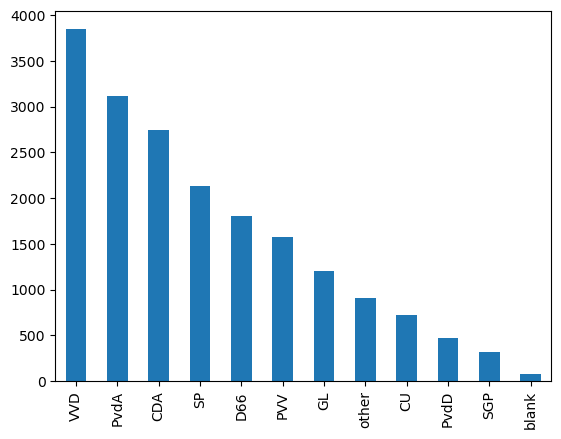

In [112]:
finaldataset.partyvote.value_counts().plot.bar()

__label encode target variable for imputation stage__

In [113]:
label_encoder = LabelEncoder()

In [114]:
finaldataset['partyvote'] = label_encoder.fit_transform(finaldataset['partyvote'])

In [115]:
finaldataset['partyvote'].value_counts()

9     3849
5     3118
0     2740
8     2133
2     1803
4     1580
3     1198
11     905
1      724
6      472
7      322
10      73
Name: partyvote, dtype: int64

&nbsp;

# Replacing "I don't know" and "I prefer not to say" with numeric value for later coding

In [116]:
finaldataset = finaldataset.replace("9999999999", 9999999999)
finaldataset = finaldataset.replace(9999999998, 9999999998)
finaldataset = finaldataset.replace(-9999999998, 9999999998)
finaldataset = finaldataset.replace("-9999999999", 9999999999)
finaldataset = finaldataset.replace(-9999999999, 9999999999)
finaldataset = finaldataset.replace("I don't know", 9999999999)
finaldataset = finaldataset.replace("I prefer not to say", 9999999998)
finaldataset = finaldataset.replace("I dont know", 9999999999)
finaldataset = finaldataset.replace("not applicable", np.nan)
finaldataset = finaldataset.replace("I dont know",9999999999)
finaldataset = finaldataset.replace(99999999999,9999999999)
finaldataset = finaldataset.replace(99999999998,9999999998)

&nbsp;

# Dropping columns with too many NaN

In [117]:
pd.set_option('display.max_rows', 500)

In [118]:
percent_missing = finaldataset.isnull().sum() * 100 / len(finaldataset)
missing_value_df = pd.DataFrame({'column name': finaldataset.columns,
                                 'percent missing': percent_missing})

In [119]:
missing_value_30 = missing_value_df[missing_value_df['percent missing'] > 30]

In [120]:
print(len(missing_value_30))

37


In [121]:
missing_value_30

,column name,percent missing
gross_wages_amount,gross_wages_amount,46.159539
gross_wages_category,gross_wages_category,87.127980
know_fiscalprofit,know_fiscalprofit,91.690014
fiscalprofit_amount,fiscalprofit_amount,96.426495
self_employment,self_employment,91.727018
fiscal_profit_self_amount,fiscal_profit_self_amount,94.074113
fiscal_profit_self_amount_category,fiscal_profit_self_amount_category,97.647619
early_retirement,early_retirement,38.489190
orphan_pension,orphan_pension,36.639002
realestate_amount,realestate_amount,97.594756


In [122]:
finaldataset = finaldataset.drop(missing_value_30['column name'].unique(), axis=1, inplace=False)

In [123]:
finaldataset.shape

(18917, 54)

In [124]:
finaldataset

,date,respondent_ID,sex,age,satisfaction_individual,satisfaction_national,income,entrepreneur_freelancer,entrepreneur_freelancer_alongside,one_person_business,...,household_expenditure,big_purchase,financial_situation_future,no_arrears,rent_mortgage_arrears,general_utilities_arrear,other_arrears,months_arrears_rent,months_arrears_general_utilities,partyvote
0,202107.0,800009.0,1,66.0,8,6,0,0,0,0,...,3,1,9999999999,1,0,0,0,0,0,5
1,202106.0,800015.0,1,58.0,7,7,1,0,0,0,...,3,0,3,1,0,0,0,0,0,6
2,202106.0,800057.0,1,46.0,8,8,1,0,0,0,...,3,0,2,1,0,0,0,0,0,11
5,202106.0,800127.0,0,37.0,3,4,1,0,0,0,...,1,0,5,1,0,0,0,0,0,4
7,202106.0,800170.0,0,62.0,7,6,1,0,0,0,...,3,0,3,1,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24357,200806.0,899884.0,0,44.0,7,7,1,0,0,0,...,3,1,3,1,0,0,0,0,0,8
24359,200806.0,899905.0,1,57.0,7,6,1,0,0,0,...,2,0,3,1,0,0,0,0,0,0
24360,200806.0,899923.0,1,45.0,7,5,1,0,0,0,...,3,0,4,1,0,0,0,0,0,8
24361,200806.0,899951.0,0,48.0,6,5,1,1,0,0,...,2,0,3,0,0,0,1,0,0,8


In [125]:
finaldataset.reset_index(inplace=True)

In [126]:
finaldataset

,index,date,respondent_ID,sex,age,satisfaction_individual,satisfaction_national,income,entrepreneur_freelancer,entrepreneur_freelancer_alongside,...,household_expenditure,big_purchase,financial_situation_future,no_arrears,rent_mortgage_arrears,general_utilities_arrear,other_arrears,months_arrears_rent,months_arrears_general_utilities,partyvote
0,0,202107.0,800009.0,1,66.0,8,6,0,0,0,...,3,1,9999999999,1,0,0,0,0,0,5
1,1,202106.0,800015.0,1,58.0,7,7,1,0,0,...,3,0,3,1,0,0,0,0,0,6
2,2,202106.0,800057.0,1,46.0,8,8,1,0,0,...,3,0,2,1,0,0,0,0,0,11
3,5,202106.0,800127.0,0,37.0,3,4,1,0,0,...,1,0,5,1,0,0,0,0,0,4
4,7,202106.0,800170.0,0,62.0,7,6,1,0,0,...,3,0,3,1,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,24357,200806.0,899884.0,0,44.0,7,7,1,0,0,...,3,1,3,1,0,0,0,0,0,8
18913,24359,200806.0,899905.0,1,57.0,7,6,1,0,0,...,2,0,3,1,0,0,0,0,0,0
18914,24360,200806.0,899923.0,1,45.0,7,5,1,0,0,...,3,0,4,1,0,0,0,0,0,8
18915,24361,200806.0,899951.0,0,48.0,6,5,1,1,0,...,2,0,3,0,0,0,1,0,0,8


In [127]:
finaldataset = finaldataset.drop(['index'], axis=1)

In [128]:
finaldataset = finaldataset.drop(['respondent_ID'], axis=1)

In [129]:
finaldataset

,date,sex,age,satisfaction_individual,satisfaction_national,income,entrepreneur_freelancer,entrepreneur_freelancer_alongside,one_person_business,company_owner,...,household_expenditure,big_purchase,financial_situation_future,no_arrears,rent_mortgage_arrears,general_utilities_arrear,other_arrears,months_arrears_rent,months_arrears_general_utilities,partyvote
0,202107.0,1,66.0,8,6,0,0,0,0,0,...,3,1,9999999999,1,0,0,0,0,0,5
1,202106.0,1,58.0,7,7,1,0,0,0,0,...,3,0,3,1,0,0,0,0,0,6
2,202106.0,1,46.0,8,8,1,0,0,0,0,...,3,0,2,1,0,0,0,0,0,11
3,202106.0,0,37.0,3,4,1,0,0,0,0,...,1,0,5,1,0,0,0,0,0,4
4,202106.0,0,62.0,7,6,1,0,0,0,0,...,3,0,3,1,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,200806.0,0,44.0,7,7,1,0,0,0,0,...,3,1,3,1,0,0,0,0,0,8
18913,200806.0,1,57.0,7,6,1,0,0,0,0,...,2,0,3,1,0,0,0,0,0,0
18914,200806.0,1,45.0,7,5,1,0,0,0,0,...,3,0,4,1,0,0,0,0,0,8
18915,200806.0,0,48.0,6,5,1,1,0,0,0,...,2,0,3,0,0,0,1,0,0,8


&nbsp;

# Handling I don't know and refusal answers

In [130]:
def dup_col(df,n):
    end_df = df[df.columns.repeat(n)]
    end_df.columns = [f'{a}{b}' for a in df
                      for b in ['']+[f'_{x+1}' for x in range(1,n)]]
    return end_df

In [131]:
finaldataset = dup_col(finaldataset, 2)

In [132]:
dr_col = ['date_2', 'partyvote_2','sex_2']

In [133]:
finaldataset = finaldataset.drop(dr_col, axis=1)

In [134]:
duplicate_columns = ['age_2', 'satisfaction_individual_2', 'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [135]:
def category_duplicate(col,df):
    df.loc[(df[col] < 9999999998), col] = 3 # Valid
    df.loc[(df[col] == 9999999998), col] = 2 # I prefer not to say
    df.loc[(df[col] == 9999999999), col] = 1 # I don't know
    df[col] = df[col].fillna(0) # Missing (NaN)

In [136]:
finaldataset = finaldataset.replace(np.nan,-1)

__Following code will be changed later so that not all values are float dtype. This is only done for next line of codes__

In [137]:
finaldataset = finaldataset.astype(float)

In [138]:
finaldataset

,date,sex,age,age_2,satisfaction_individual,satisfaction_individual_2,satisfaction_national,satisfaction_national_2,income,income_2,...,rent_mortgage_arrears_2,general_utilities_arrear,general_utilities_arrear_2,other_arrears,other_arrears_2,months_arrears_rent,months_arrears_rent_2,months_arrears_general_utilities,months_arrears_general_utilities_2,partyvote
0,202107.0,1.0,66.0,66.0,8.0,8.0,6.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,202106.0,1.0,58.0,58.0,7.0,7.0,7.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,202106.0,1.0,46.0,46.0,8.0,8.0,8.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,202106.0,0.0,37.0,37.0,3.0,3.0,4.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,202106.0,0.0,62.0,62.0,7.0,7.0,6.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,200806.0,0.0,44.0,44.0,7.0,7.0,7.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
18913,200806.0,1.0,57.0,57.0,7.0,7.0,6.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18914,200806.0,1.0,45.0,45.0,7.0,7.0,5.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
18915,200806.0,0.0,48.0,48.0,6.0,6.0,5.0,5.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0


In [139]:
for col in finaldataset.columns:
    for i in duplicate_columns:
        if col == i:
            category_duplicate(col,finaldataset)

In [140]:
for col in finaldataset.columns:
    for i in duplicate_columns:
        if col == i:
            print(finaldataset[col].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


__Replace invalid answers with NaN__

In [141]:
finaldataset = finaldataset.replace(9999999998, np.NaN)
finaldataset = finaldataset.replace(9999999999, np.NaN)

In [142]:
finaldataset = finaldataset.replace(-1, np.NaN)

&nbsp;

# transform variable type to category

In [143]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [170]:
ordinal_columns = ['satisfaction_individual', 'satisfaction_national', 
                   'financial_situation_category', 'financial_situation_grade',
                   'financial_situation_future', 'difficulty_life_grade', 'household_expenditure']

__category__

In [145]:
for col in finaldataset.columns:
    for i in category_columns:
        if col == i:
            finaldataset[col] = finaldataset[col].astype('category')

__save dataframe for valence imputation__

In [153]:
finaldataset.to_csv('finaldataset_for_val.csv')

&nbsp;

# Multiple Imputation with MICE

__check n missing values__

In [154]:
print(finaldataset.isna().sum().sum())

51966


__add column full of 0, to solve indexrange error__

In [155]:
finaldataset.loc[len(finaldataset)] = 0

In [156]:
kernel_imp = mf.ImputationKernel(
    data=finaldataset,
    datasets=4,
    save_all_iterations=True,
    random_state=1908)

In [157]:
kernel_imp.mice(3,verbose=True)

Initialized logger with name mice 1-3
Dataset 0
1  | age | income | none_work_situation | other | entrepreneur_freelancer_alongside | private_limited_liability_company | company_owner | partner_partnership | one_person_business | entrepreneur_freelancer | partnership | nabestaandenpensioen | invadility_pension | WGA | zorgtoeslag | kinderbijslag | bijstand_zelfstandigen | ANW | bijstand | none_benefit | Ziektewetuitkering | income_realestate | none_sources | student_grant | interests | student_loan | dividend_stock_investment | alimony_ex | alimony_children | allowence_family | study_allowance_parents | interest_loans | support_gift_paid | satisfaction_individual | satisfaction_national | financial_situation_grade | difficulty_life_grade | financial_situation_category | household_expenditure | big_purchase | no_arrears | rent_mortgage_arrears | general_utilities_arrear | other_arrears | months_arrears_general_utilities | months_arrears_rent | financial_situation_future | IOAWIOAZ | tax

In [158]:
print(kernel_imp)


              Class: ImputationKernel
           Datasets: 4
         Iterations: 3
       Data Samples: 18918
       Data Columns: 103
  Imputed Variables: 50
save_all_iterations: True


__check correlations__

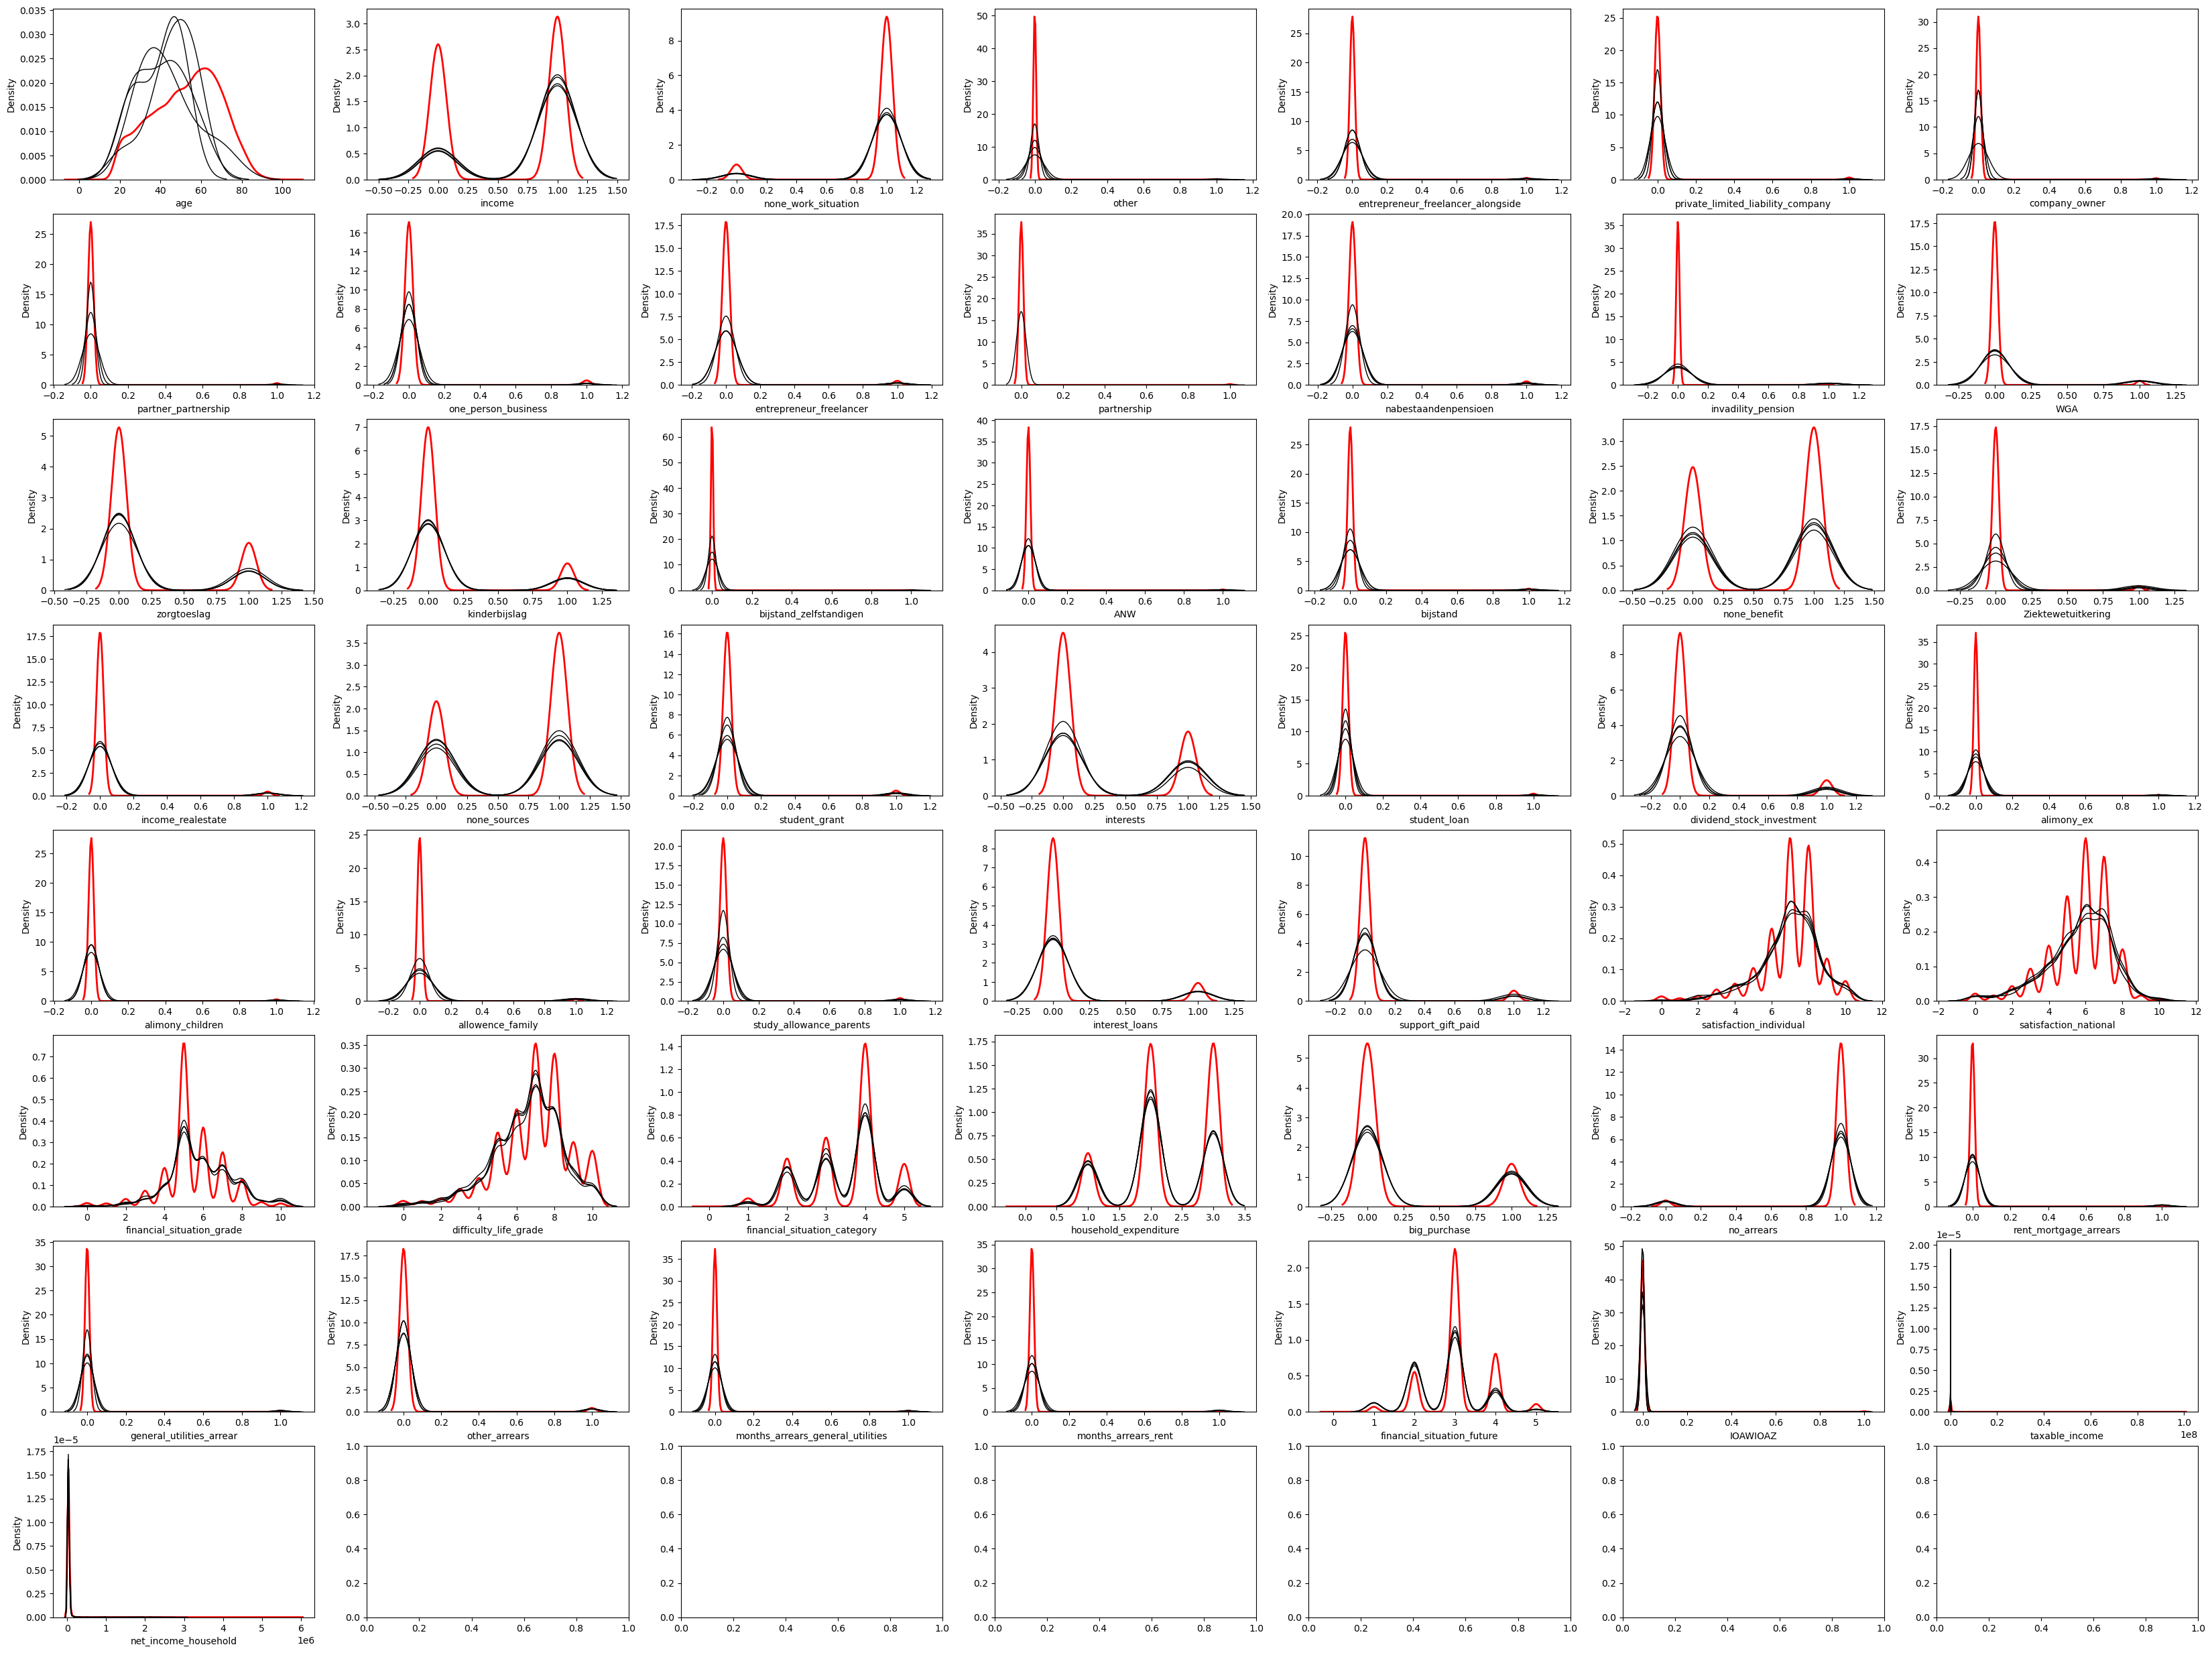

In [159]:
kernel_imp.plot_imputed_distributions(wspace=0.2,hspace=0.2, left=25, right=30, bottom=25, top=30)

__impute values in existing dataset__

In [160]:
new_data = kernel_imp.impute_new_data(finaldataset)

In [161]:
finaldataset = new_data.complete_data(0)

In [162]:
print(finaldataset.isna().sum().sum())

0


In [163]:
finaldataset = finaldataset[:-1]

__The plots above tell that the categorical values of 1-10 are imputed with values between the 4 and 5, thus floats. However, the following line of code shows that the imputation is done correctly as there are 10 unique values (categories) after imputation. Hence, miceforest does this plot for all categories with 5+ categories in my data__

In [164]:
finaldataset.difficulty_life_grade.unique()

array([ 8.,  9.,  3.,  7., 10.,  6.,  5.,  4.,  0.,  1.,  2.])

&nbsp;

# Transforming variables to correct dtype after imputation

__target variable__

In [165]:
finaldataset['partyvote'] = finaldataset['partyvote'].replace([9, 2, 4, 0, 8, 5, 3, 6, 1, 11, 7, 10],  
                                          ['VVD', 'D66', 'PVV', 'CDA', 'SP',
                                           'PvdA', 'GL', 'PvdD', 'CU', 'other',
                                           'SGP', 'blank'])

__categorical variable__

In [167]:
for col in finaldataset.columns:
    for i in category_columns:
        if col == i:
            finaldataset[col] = finaldataset[col].astype('category')

__ordinal variables__

In [171]:
for col in finaldataset.columns:
    for i in ordinal_columns:
        if col == i:
            finaldataset[col] = LabelEncoder().fit_transform(finaldataset[col])

In [174]:
finaldataset.dtypes

date                                    float64
sex                                    category
age                                     float64
age_2                                  category
satisfaction_individual                   int64
satisfaction_individual_2              category
satisfaction_national                     int64
satisfaction_national_2                category
income                                 category
income_2                               category
entrepreneur_freelancer                category
entrepreneur_freelancer_2              category
entrepreneur_freelancer_alongside      category
entrepreneur_freelancer_alongside_2    category
one_person_business                    category
one_person_business_2                  category
company_owner                          category
company_owner_2                        category
partnership                            category
partnership_2                          category
partner_partnership                    c

&nbsp;

# Save cleaned dataset

In [175]:
finaldataset.to_csv('finaldataset_ind.csv')